In [439]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import math

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [157]:
trainds = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Titanic\titanic\train.csv")

In [158]:
testds = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Titanic\titanic\test.csv")

In [296]:
submission = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Titanic\titanic\gender_submission.csv")

In [159]:
trainds.shape

(891, 12)

In [160]:
testds.shape

(418, 11)

In [161]:
trainds[trainds.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [162]:
trainds.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.00,0,0,28403,26.0000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.00,0,0,336439,7.7500,NaN,Q
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,2666,19.2583,NaN,C
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.00,0,0,14973,8.0500,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.00,1,0,PC 17603,59.4000,NaN,C
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
461,462,0,3,"Morley, Mr. William",male,34.00,0,0,364506,8.0500,NaN,S


In [163]:
trainds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [164]:
testds['Survived'] = np.nan

In [165]:
testds.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived       418
dtype: int64

In [166]:
data = pd.concat([trainds, testds])

In [167]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:ylabel='Frequency'>

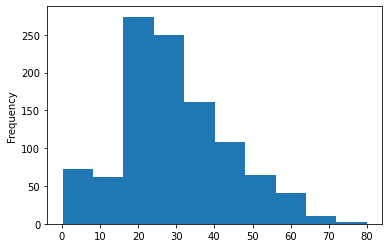

In [168]:
data['Age'].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

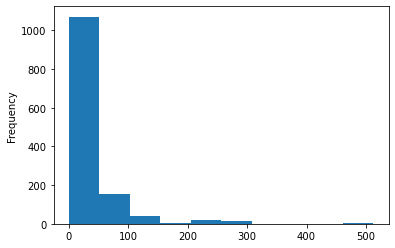

In [169]:
data['Fare'].plot(kind = "hist")

<AxesSubplot:>

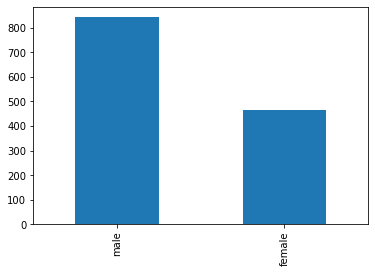

In [170]:
data["Sex"].value_counts().plot(kind = "bar")

<AxesSubplot:>

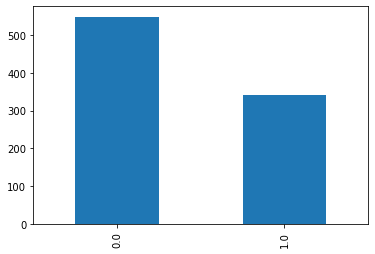

In [171]:
data["Survived"].value_counts().plot(kind = "bar")

<AxesSubplot:>

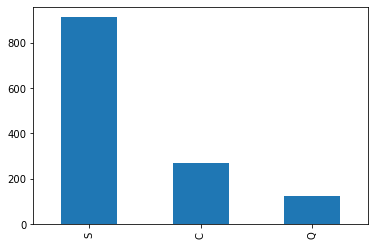

In [172]:
data["Embarked"].value_counts().plot(kind = "bar")

<AxesSubplot:>

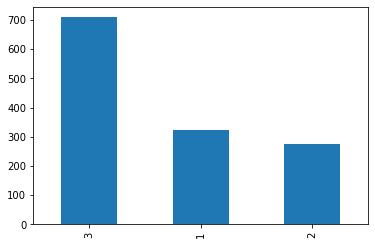

In [173]:
data["Pclass"].value_counts().plot(kind = "bar")

<AxesSubplot:>

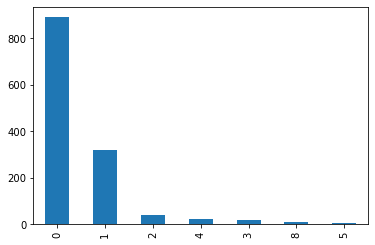

In [174]:
data["SibSp"].value_counts().plot(kind = "bar")

<AxesSubplot:>

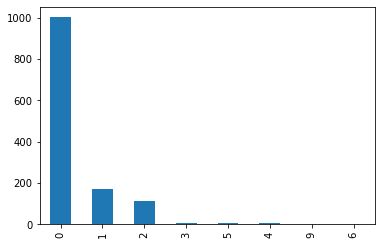

In [175]:
data["Parch"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Pclass'>

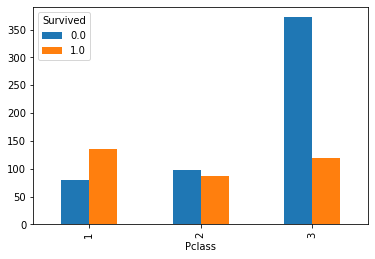

In [176]:
pd.crosstab(data["Pclass"],data['Survived']).plot(kind = "bar") 
## More loss of lives in 3-Class -- Lower tier or deck in the ship

<AxesSubplot:xlabel='Embarked'>

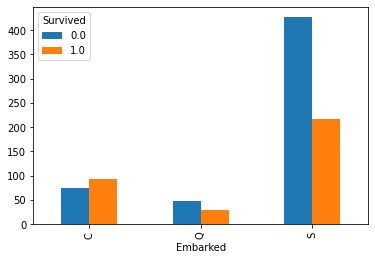

In [177]:
pd.crosstab(data["Embarked"],data['Survived']).plot(kind = 'bar') ## C = Cherbourg, Q = Queenstown, S = Southampton
## Seems loss is more where people have embarked in Southampton... whats the relation???

<AxesSubplot:xlabel='Sex'>

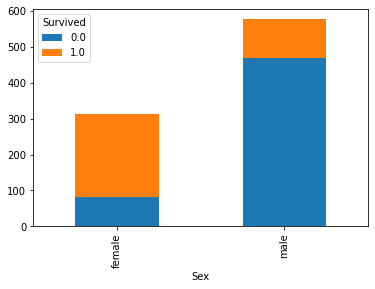

In [178]:
pd.crosstab(data["Sex"],data['Survived']).plot(kind = 'bar', stacked=True) 
## Females have survived more


<AxesSubplot:xlabel='Parch'>

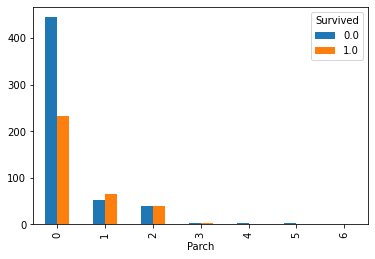

In [179]:
pd.crosstab(data["Parch"],data['Survived']).plot(kind = 'bar') 
## People travelling as a family survived better than travelling alone

<AxesSubplot:xlabel='SibSp'>

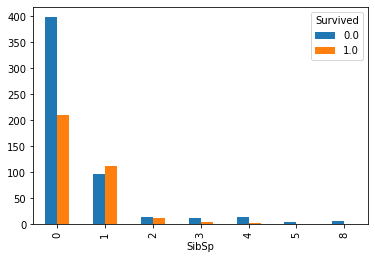

In [180]:
pd.crosstab(data["SibSp"],data['Survived']).plot(kind = 'bar') 
## People travelling as a family survived better than travelling alone

<AxesSubplot:xlabel='Age'>

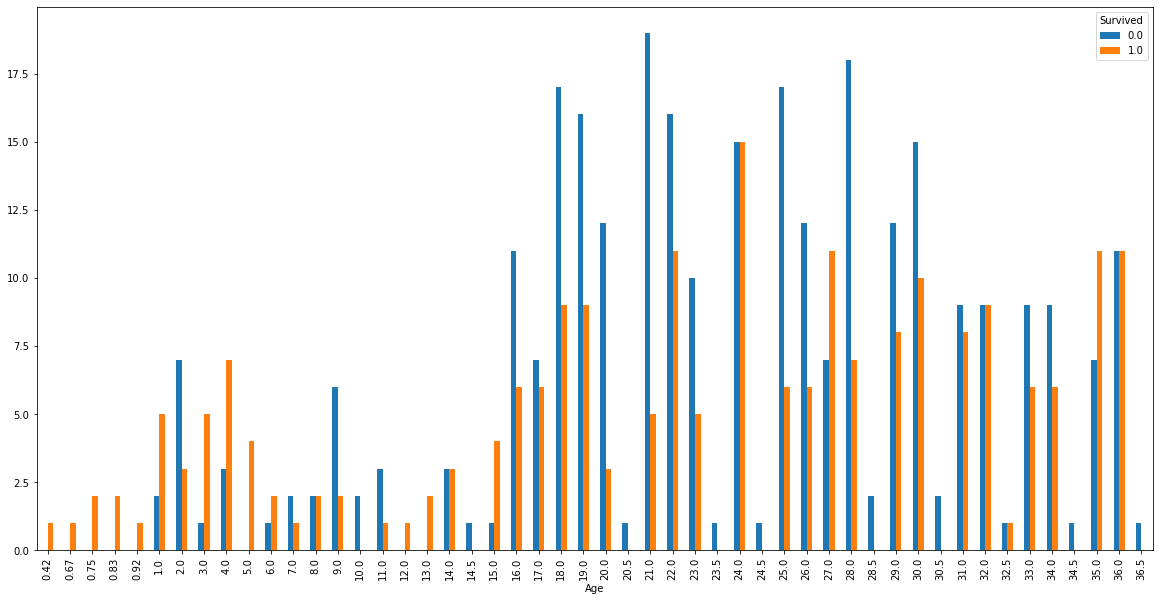

In [181]:
pd.crosstab(data["Age"],data['Survived']).head(50).plot(kind = 'bar',  figsize=(20, 10)) 

<AxesSubplot:xlabel='Age'>

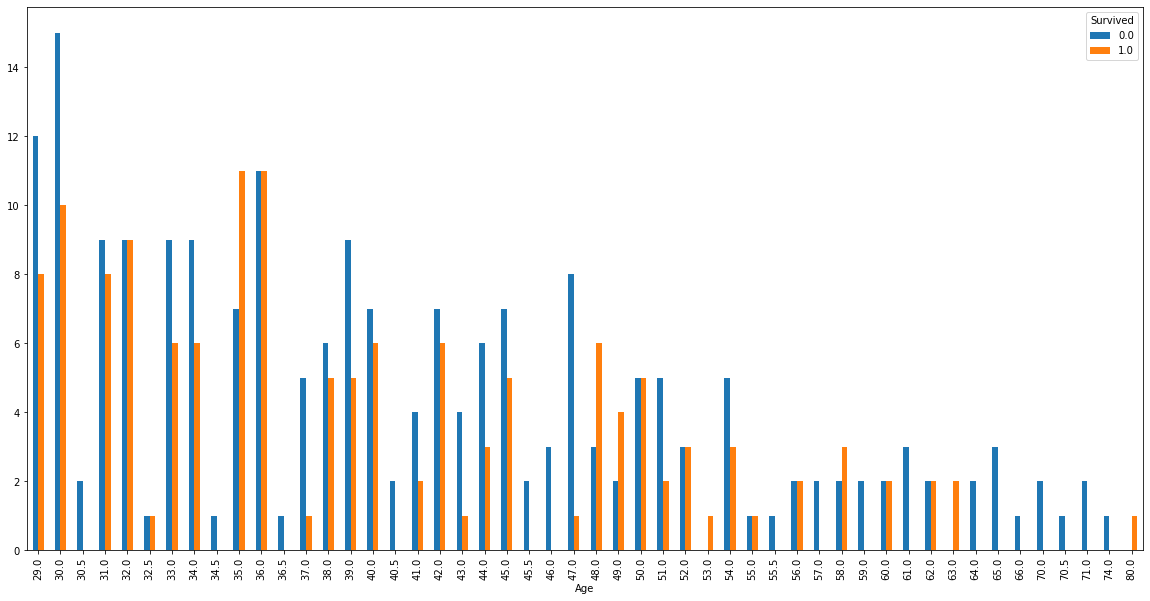

In [182]:
pd.crosstab(data["Age"],data['Survived']).tail(50).plot(kind = 'bar', figsize=(20, 10)) 

In [183]:
data[(data['Age'] >.01) & (data['Age'] < 12) & (data['Survived'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0.0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
50,51,0.0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0.0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
147,148,0.0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
171,172,0.0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q


In [184]:
data[(data['Age'] >.01) & (data['Age'] < 12) & (data['Survived'] == 1)].sort_values(by='Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
445,446,1.0,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
802,803,1.0,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
535,536,1.0,2,"Hart, Miss. Eva Miriam",female,7.00,0,2,F.C.C. 13529,26.2500,NaN,S
530,531,1.0,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S
720,721,1.0,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.00,0,1,248727,33.0000,NaN,S
831,832,1.0,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
750,751,1.0,2,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,NaN,S
407,408,1.0,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S
755,756,1.0,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [185]:
## Though the childrens' survival is spread across all the classes, fatalities are more in 3-Class

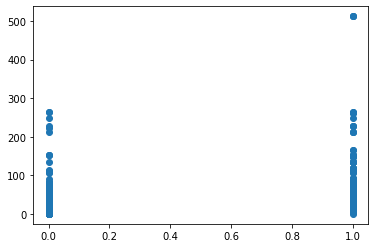

In [186]:
plt.scatter(data['Survived'], data['Fare'])
## Fare seems to have no relation to survival

In [187]:
data.pivot_table(values="Fare", index = "Age", columns = "Pclass").head(50)

Pclass,1,2,3
Age,,,
0.17,NaN,NaN,20.575000
0.33,NaN,NaN,14.400000
0.42,NaN,NaN,8.516700
0.67,NaN,14.500000,NaN
0.75,NaN,NaN,17.430533
0.83,NaN,23.875000,9.350000
0.92,151.550000,27.750000,NaN
1.00,NaN,39.194467,23.274400
2.00,151.550000,25.000000,24.003125


In [188]:
from scipy.stats import mode

In [189]:
data.pivot_table(values="Survived", index = "Sex", columns = "Pclass",aggfunc=(lambda x: mode(x)[0]))

Pclass,1,2,3
Sex,,,
female,1.0,1.0,0.0
male,0.0,0.0,0.0


In [190]:
data.pivot_table(values="Survived", index = "Sex", columns = "SibSp",aggfunc=(lambda x: mode(x)[0]))

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,1.0,1.0,1.0,0.0,0.0,0.0,0.0
male,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
data['Age'][data['Survived'] == 1].unique() ## Survival is spread across all ages

array([38.  , 26.  , 35.  , 27.  , 14.  ,  4.  , 58.  , 55.  ,   nan,
       34.  , 15.  , 28.  ,  3.  , 19.  , 49.  , 29.  , 21.  ,  5.  ,
       17.  , 32.  ,  0.83, 30.  , 33.  , 23.  , 32.5 , 12.  , 24.  ,
       22.  , 16.  , 40.  ,  9.  ,  1.  , 45.  , 44.  , 18.  , 31.  ,
        8.  , 37.  , 50.  , 25.  , 41.  , 63.  , 42.  ,  0.92, 36.  ,
        2.  , 60.  , 39.  , 13.  , 52.  , 48.  ,  0.75, 54.  ,  7.  ,
       62.  , 53.  , 20.  , 80.  , 56.  ,  6.  ,  0.67, 51.  , 43.  ,
       11.  ,  0.42, 47.  ])

In [192]:
data['Age'][data['Survived'] == 0].unique() ## Same with Non-Survival

array([22. , 35. ,  nan, 54. ,  2. , 20. , 39. , 14. , 31. ,  8. , 19. ,
       40. , 66. , 28. , 42. , 21. , 18. , 27. ,  7. , 65. , 28.5, 11. ,
       45. ,  4. , 26. , 32. , 16. , 25. , 24. , 29. , 46. , 59. , 71. ,
       34. , 33. , 37. , 38. , 47. , 14.5, 17. , 70.5, 32.5, 23. ,  9. ,
       36.5, 51. , 55.5, 40.5, 30. , 44. ,  1. , 61. , 56. , 50. , 36. ,
       45.5, 20.5, 62. , 41. , 52. , 23.5, 43. , 15. ,  3. , 10. , 64. ,
       48. , 58. , 55. , 49. , 57. , 70. , 24.5, 60. , 30.5,  6. , 34.5,
       74. ])

### Key points based on EDA
Chances of surviving are higher for,
1. Females
2. Class 1 and 2
3. Travelling as a family, both parents and siblings
4. Childrens' fatalities were more in Class-3
5. If you have embarked in southampton --???

In [193]:
data["Sex"].replace({"female":1, "male":0}, inplace=True)

<AxesSubplot:>

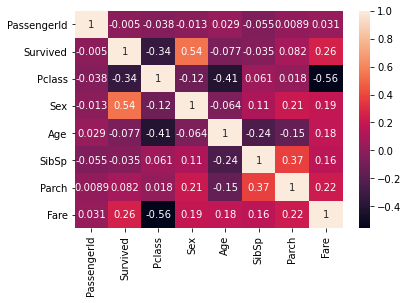

In [194]:
sns.heatmap(data.corr(),annot=True)

In [195]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


In [196]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [197]:
data[data['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [198]:
data['Fare'][(data['Sex'] == 0) & (data['Age'] >= 60) & (data['Age'] <= 61) & (data['SibSp'] == 0) & (data['Parch'] == 0) & (data['Embarked'] == 'S')].mean()

24.652075

In [199]:
data['Fare'].fillna(24.652075, inplace=True)

In [200]:
data[data['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [201]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [202]:
data[(data['Sex'] == 1) & (data['SibSp'] == 0) & (data['Parch'] == 0) & (data['Fare'] == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [203]:
data[(data['Sex'] == 1) & (data['Fare'] >= 70) & (data['Fare'] <= 85) & (data['SibSp'] == 0) & (data['Parch'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,NaN
218,219,1.0,1,"Bazzani, Miss. Albina",1,32.0,0,0,11813,76.2917,D15,C
256,257,1.0,1,"Thorne, Mrs. Gertrude Maybelle",1,NaN,0,0,PC 17585,79.2000,NaN,C
290,291,1.0,1,"Barber, Miss. Ellen ""Nellie""",1,26.0,0,0,19877,78.8500,NaN,S
310,311,1.0,1,"Hays, Miss. Margaret Bechstein",1,24.0,0,0,11767,83.1583,C54,C
627,628,1.0,1,"Longley, Miss. Gretchen Fiske",1,21.0,0,0,13502,77.9583,D9,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0000,B28,NaN
48,940,NaN,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",1,60.0,0,0,11813,76.2917,D15,C


In [204]:
data['Embarked'].fillna('C', inplace=True)

In [205]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [206]:
data['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
D                  4
                  ..
B102               1
C49                1
B82 B84            1
D40                1
A10                1
Name: Cabin, Length: 186, dtype: int64

In [207]:
data['Cabin'].fillna('unknown', inplace=True)

In [208]:
''' A-E Class1 A10 - E8
    D-F Class2 D - F4
    E-G Class3 E10 - G6 '''

' A-E Class1 A10 - E8\n    D-F Class2 D - F4\n    E-G Class3 E10 - G6 '

In [209]:
data[(data['Cabin'] != 'unknown') & (data['Pclass'] == 3)].sort_values(['Cabin']).tail(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
429,430,1.0,3,"Pickard, Mr. Berk (Berk Trembisky)",0,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
751,752,1.0,3,"Moor, Master. Meier",0,6.0,0,1,392096,12.4750,E121,S
823,824,1.0,3,"Moor, Mrs. (Beila)",1,27.0,0,1,392096,12.4750,E121,S
288,1180,NaN,3,"Mardirosian, Mr. Sarkis",0,NaN,0,0,2655,7.2292,F E46,C
321,1213,NaN,3,"Krekorian, Mr. Neshan",0,25.0,0,0,2654,7.2292,F E57,C
128,129,1.0,3,"Peter, Miss. Anna",1,NaN,1,1,2668,22.3583,F E69,C
699,700,0.0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0,42.0,0,0,348121,7.6500,F G63,S
57,949,NaN,3,"Abelseth, Mr. Olaus Jorgensen",0,25.0,0,0,348122,7.6500,F G63,S
75,76,0.0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
715,716,0.0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",0,19.0,0,0,348124,7.6500,F G73,S


In [210]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [211]:
print(min(data['Age']))
print(max(data['Age']))

0.17
80.0


In [212]:
male_mean, female_mean = data.groupby(['Sex'])['Age'].mean()

In [213]:
male_mean

30.58522796352584

In [214]:
female_mean

28.68708762886598

In [215]:
def age_func(age, sex):
    if math.isnan(age):
        if sex == 0:
            return male_mean
        else:
            return female_mean
    else:
        return age

In [216]:
data['new_age'] = data.apply(lambda x : age_func(x["Age"],x["Sex"]),axis = 1)

In [217]:
data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,unknown,S,22.000000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,26.000000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,unknown,S,35.000000
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,unknown,Q,30.585228
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,unknown,S,2.000000
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,unknown,S,27.000000
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,unknown,C,14.000000


In [218]:
data['Age'] = data['new_age']

In [220]:
del data['new_age']

In [221]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S


In [222]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

<AxesSubplot:>

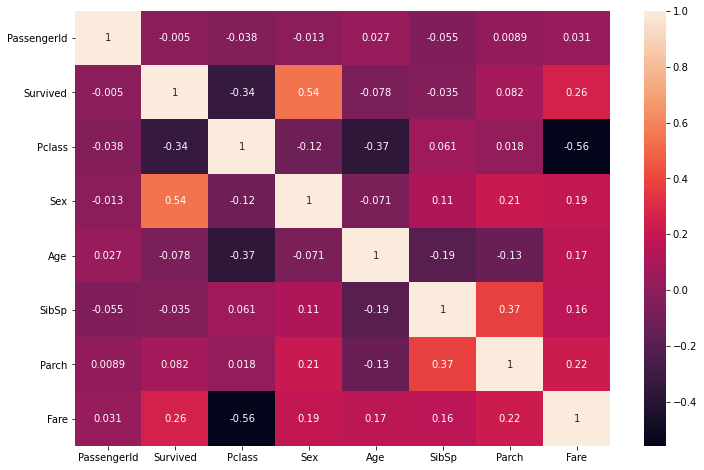

In [230]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

## Preprocessing

In [232]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


In [234]:
data1 = data.drop(columns=['Cabin', 'Ticket', 'Name'])

In [235]:
data1.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,S
1,2,1.0,1,1,38.0,1,0,71.2833,C


In [319]:
data1['Embarked'].replace({'C': 3, 'Q': 2,'S': 1}, inplace=True)

In [396]:
num_cols = data1.select_dtypes(include = np.number).drop(columns='Survived').columns

In [397]:
cat_cols = data1.select_dtypes(exclude= np.number).columns

In [323]:
##cat_pp = pd.get_dummies(data1[cat_cols])

In [398]:
scaler = StandardScaler()

In [399]:
num_pp = pd.DataFrame(scaler.fit_transform(data1[num_cols]), columns=num_cols)

In [400]:
num_pp.shape

(1309, 8)

In [413]:
num_pp.reset_index(drop='index', inplace=True)

In [414]:
data1.reset_index(drop='index', inplace=True)

In [324]:
##num_pp = data1[num_cols]

In [249]:
##pp_data = pd.concat([num_pp, cat_pp], axis='columns')

In [416]:
pp_data = pd.concat([num_pp, data1['Survived']], axis=1)

In [417]:
pp_data.head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.730728,0.841916,-0.743497,-0.613888,0.481288,-0.445,-0.503462,-0.624618,0.0
1,-1.728082,-1.546098,1.344995,0.627937,0.481288,-0.445,0.734622,1.827031,1.0
2,-1.725435,0.841916,1.344995,-0.303432,-0.479087,-0.445,-0.490411,-0.624618,1.0
3,-1.722789,-1.546098,1.344995,0.395095,0.481288,-0.445,0.383048,-0.624618,1.0
4,-1.720143,0.841916,-0.743497,0.395095,-0.479087,-0.445,-0.487994,-0.624618,0.0
5,-1.717496,0.841916,-0.743497,0.052446,-0.479087,-0.445,-0.480099,0.601206,0.0
6,-1.714850,-1.546098,-0.743497,1.869763,-0.479087,-0.445,0.359121,-0.624618,0.0


In [418]:
pp_test = pp_data[pp_data['Survived'].isna()].drop(columns='Survived')

In [419]:
pp_train = pp_data.dropna(subset=['Survived'])

## Model Building

#### Training

In [420]:
logistic = LogisticRegression(max_iter=100)

In [421]:
X_train = pp_train.drop(columns=['PassengerId','Survived'])

In [422]:
y_train = pp_train['Survived']

In [423]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [424]:
y_train_pred = logistic.predict(X_train)

In [425]:
logistic.coef_

array([[-0.89515523,  1.28998076, -0.50389217, -0.33731679, -0.08421628,
         0.10365653,  0.18327748]])

In [426]:
logistic.intercept_

array([-0.60706453])

<AxesSubplot:>

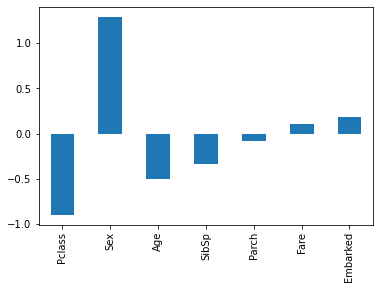

In [427]:
pd.Series(data = logistic.coef_[0],index=X_train.columns).plot(kind='bar')

In [428]:
accuracy_score(y_train, y_train_pred)

0.8002244668911336

In [429]:
confusion_matrix(y_train, y_train_pred)

array([[473,  76],
       [102, 240]], dtype=int64)

#### Using CVS to gauge the model accuracy

In [440]:
cross_val_score(logistic, X_train, y_train, scoring='accuracy', cv=10)

array([0.78888889, 0.79775281, 0.7752809 , 0.80898876, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.84269663])

#### Testing

In [430]:
pp_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0.627190,0.841916,-0.743497,0.356288,-0.479087,-0.445000,-0.492263,0.601206
892,0.629837,0.841916,1.344995,1.326464,0.481288,-0.445000,-0.508296,-0.624618
893,0.632483,-0.352091,-0.743497,2.490676,-0.479087,-0.445000,-0.456333,0.601206
894,0.635130,0.841916,-0.743497,-0.225818,-0.479087,-0.445000,-0.476151,-0.624618
895,0.637776,0.841916,1.344995,-0.613888,0.481288,0.710763,-0.406062,-0.624618


In [431]:
X_test = pp_test.drop(columns='PassengerId')

In [432]:
y_test_pred = logistic.predict(X_test).astype(int)

In [433]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [434]:
submission.head(1)

,PassengerId,Survived
0,892,0


In [435]:
submission['Survived'] = y_test_pred

In [436]:
submission.head(6)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0


In [437]:
submission.to_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Titanic\titanic\final_submission3.csv', index=False)